# Ablation runtime

the current version of this plot relies on the regularization runtimes, so ablation_regularization has to be run before calling this script

In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

import corc.our_datasets

cache_path = "../cache"

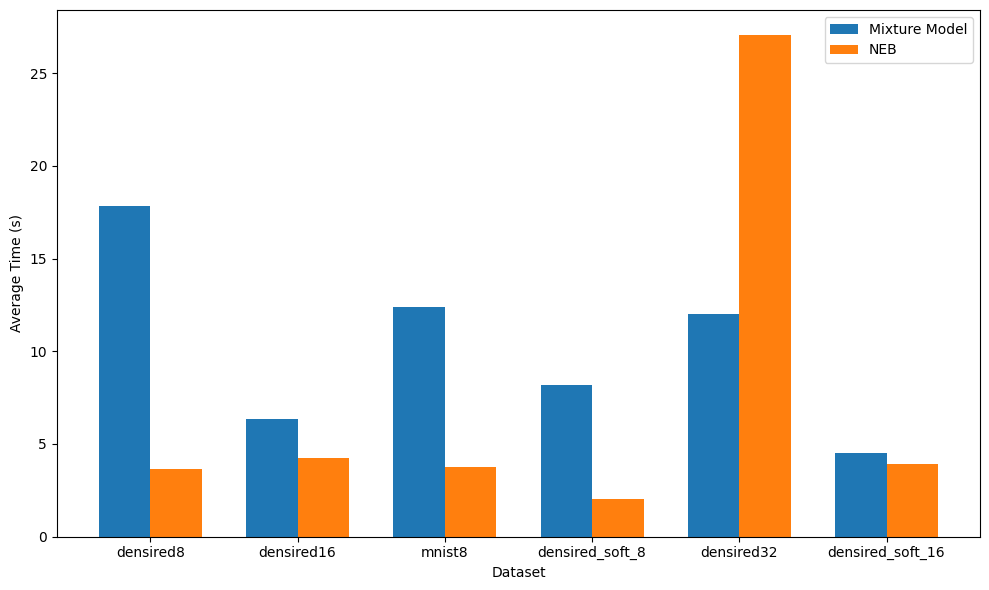

In [7]:
# Load the pickled tmm_levels dictionary
filename = os.path.join(cache_path, "ablations", "tmms_regularization.pickle")
with open(filename, "rb") as f:
    tmm_levels = pickle.load(f)

# Create lists to store the average runtime values for each dataset
time_mixture_values = dict()
time_neb_values = dict()

# Loop through each dataset
for dataset in tmm_levels.keys():
    if dataset in corc.our_datasets.DATASETS2D:
        continue
    time_mixture_dataset = list()
    time_neb_dataset = list()
    for level in tmm_levels[dataset].keys():
        for tmm in tmm_levels[dataset][level]:
            time_mixture_dataset.append(tmm.time_mixture)
            time_neb_dataset.append(tmm.time_NEB)
    time_mixture_values[dataset] = np.mean(time_mixture_dataset)
    time_neb_values[dataset] = np.mean(time_neb_dataset)

# Create the plot
fig, axs = plt.subplots(1, figsize=(10, 6))

# Plot the average time_mixture and time_NEB values
bar_width = 0.35
x = np.arange(len(time_mixture_values.keys()))
axs.bar(x - bar_width/2, time_mixture_values.values(), bar_width, label='Mixture Model')
axs.bar(x + bar_width/2, time_neb_values.values(), bar_width, label='NEB')

axs.set_xlabel('Dataset')
axs.set_ylabel('Average Time (s)')
# axs.set_title('Average Time for Mixture Model and NEB')
axs.set_xticks(x)
axs.set_xticklabels(time_mixture_values.keys())
axs.legend()

# Show the plots
plt.tight_layout()
plt.show()

note that since some runtimes are cpu and others are gpu, this is not really comparable...